# Machine Learning in Python

In this lesson you'll learn how to do some of the statistical modelling techniques that you've learnt so far in Python. Python and R take rather different approaches to statistical modelling. R was designed for statistics, and has built in support for t-tests, linear models etc. Python was not designed for statistics, and while it is possible to do all types of statistical tests in Python, it's not as straight forward. 

Python is generally designed for *machine learning*. This generally means models are focused on predictive accuracy, rather than interpretation. Python also has a focus on *machine learning pipelines*; this forces you to think more about how your data is going to be processed.

With modern R and modern Python there are very few techniques that you can't do in both languages. The differences lie in what is easy to do, rather than what is possible. 

# Learning Objectives

* Be able to use `scikit-learn` to build models in R.
* Understand some of the differences between model building in R and Python.
* Understand the how a random forest classifier works. 

**Lesson Duration: 2 hours**

# Linear Regression

## Exploring the data

To start we are going to see an example of building a linear model. The dataset we are going to use is "conspiracy_belief_score.csv". This dataset comes from the Open Psychometrics project. It has information on the conspiracy belief score for people who took an online test. We also have information on people backgrounds, including their age, gender and where they live. 

We are going to try to model the conspiracy belief score using some of the other variables available to us in the dataset.

Before we start building models we need to make sure we understand the data. 

First we read the data in:

In [27]:
import pandas as pd

conspiracy_belief = pd.read_csv("data/conspiracy_belief_score.csv")

Then use `head()` to look at the first few rows.

In [28]:
conspiracy_belief.head()

conspiracy_belief_score              education             childhood  \
0                 4.333333  Less than high school              Suburban   
1                 2.466667        Graduate degree              Suburban   
2                 3.666667      University degree  Rural (country side)   
3                 3.933333            High school              Suburban   
4                 1.000000      University degree  Rural (country side)   

   gender   hand  family_size  age  test_time  
0  Female  Right            1   14        125  
1  Female  Right            2   26        141  
2    Male  Right            3   25         58  
3    Male  Right            2   37        105  
4    Male  Right            2   34         87

And `describe()` to get some summary statistics.

In [29]:
conspiracy_belief.describe()

conspiracy_belief_score  family_size          age    test_time
count              2301.000000  2301.000000  2301.000000  2301.000000
mean                  2.887266     2.519774    27.621034   147.853542
std                   1.033407     1.323426    13.312523   352.173772
min                   0.866667     0.000000    13.000000     3.000000
25%                   2.066667     2.000000    18.000000    82.000000
50%                   2.866667     2.000000    22.000000   107.000000
75%                   3.666667     3.000000    34.000000   141.000000
max                   5.000000    19.000000    75.000000  9881.000000

There is lots you could do to explore this data using `pandas` and `seaborn`, but we're going to cheat by using a Python package!

Install pandas profiling using the following command in the terminal.

```
conda install -c conda-forge pandas-profiling
```

This package has a function `ProfileReport` which has lots of plots and summaries that are particularly useful for doing modelling. Run this now.


In [30]:
import pandas_profiling

pandas_profiling.ProfileReport(conspiracy_belief)

**Task - 5 minutes**

Have a look at the report. 

Do you see anything that needs to be cleaned?

## Cleaning data

After you have explored the data you'll need to clean the data. As you  know from making models in R, there are lots of things you might need to do to clean the data. 

We have given you a nice clean dataset here so the only thing we need to do is create dummies. 

### Creating dummies 

Unlike R, when you are working in Python you need to create dummies yourself. Luckily, there is a function from pandas that makes this easy.

In [31]:
conspiracy_belief = pd.get_dummies(conspiracy_belief, drop_first = True)

conspiracy_belief.head()

conspiracy_belief_score  family_size  age  test_time  \
0                 4.333333            1   14        125   
1                 2.466667            2   26        141   
2                 3.666667            3   25         58   
3                 3.933333            2   37        105   
4                 1.000000            2   34         87   

   education_High school  education_Less than high school  \
0                      0                                1   
1                      0                                0   
2                      0                                0   
3                      1                                0   
4                      0                                0   

   education_University degree  childhood_Suburban  \
0                            0                   1   
1                            0                   1   
2                            1                   0   
3                            0                   1   
4                            1                   0   

   childhood_Urban (town, city)  gender_Male  gender_Other  hand_Right  
0                             0            0             0           1  
1                             0            0             0           1  
2                             0            1             0           1  
3                             0            1             0           1  
4                             0            1             0           1

We set `drop_first = True` because for a variable with four levels, you only need three dummy variables.

## Building the model

Now finally we can build our model! 

To build all the models today we are going to use a package called `scikit-learn`. This package has a huge range of different models. Unlike R, we don't have any models built in to the language. Also, in R you generally have to download a new package for each new model you want to run. This is different in Python and almost every model you could never need is inside `scikit-learn`.

You do not need to install anything, as `scikit-learn` comes as part of Anaconda.

Since `scikit-learn` is so large, we normally import the models one at a time.

In [32]:
from sklearn.linear_model import LinearRegression

The syntax for describing a model is different in Python compared to R. We need to make a data frame with all the variables we are using for predicting, and we need the variable we want to predict in it's own array. 

In [33]:
y = conspiracy_belief["conspiracy_belief_score"]
X = conspiracy_belief.drop(columns = "conspiracy_belief_score")

Then we define the model we want to use and fit it using the data we extracted.

In [34]:
model = LinearRegression()

model.fit(X, y)

LinearRegression()

Unlike R, we don't have a handy summary of the model. But we can pull out the R-squared value by using the `score` method.

In [35]:
model.score(X, y)

0.040043284303887816

We know the score method brings back R-squared for linear regression from the info in the `LinearRegression()` documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

To get the coefficients, we need to do it in two parts. We get the coefficient for the intercept by looking at the `intercept_` attribute.

In [36]:
model.intercept_

2.397096757592804

And we get the rest of the coefficients using the `coef_` attribute. These coefficients are returned in the same order as  the variables appear in the data.


In [37]:
model.coef_

array([ 3.87812859e-02,  7.39820803e-03,  1.05323590e-04,  4.34347163e-01,
        3.32422446e-01,  1.45233709e-01, -5.03516396e-02,  1.10445101e-01,
       -2.09621506e-01,  5.34224823e-03, -2.52485900e-02])

**Task - 5 mins**

1. Interpret the R-squared value
2. Interpret some of the coefficients. (**Hint** - think about how you could combine this array output with the column names to easily see which value corresponds to what variable in the data).

**Solution**

1. These are very low R-squared values. We're not doing a very good job at predicting conspiracy belief score!

2. See below

In [38]:
pd.DataFrame(
  {
  "Variable" : X.columns.values,
  "Coefficient" : model.coef_
  }
)

Variable  Coefficient
0                       family_size     0.038781
1                               age     0.007398
2                         test_time     0.000105
3             education_High school     0.434347
4   education_Less than high school     0.332422
5       education_University degree     0.145234
6                childhood_Suburban    -0.050352
7      childhood_Urban (town, city)     0.110445
8                       gender_Male    -0.209622
9                      gender_Other     0.005342
10                       hand_Right    -0.025249

For every extra member of your family your conspiracy belief score increases by 0.037 etc.

These are hard to interpret because we don't have the associated p-values. We also have available the `statsmodels` API, which provides an 'ordinary least squares' `OLS()` function with much the same information provided by `lm()` in `R`.

A weird wrinkle of this function is that it doesn't include the intercept term by default, but we can add it via the `add_constant()` function in the same package (this just adds a column `const` filled with value 1).


In [39]:
import statsmodels.api as sm
X_i = sm.add_constant(X)

X_i.head()

const  family_size  age  test_time  education_High school  \
0    1.0            1   14        125                      0   
1    1.0            2   26        141                      0   
2    1.0            3   25         58                      0   
3    1.0            2   37        105                      1   
4    1.0            2   34         87                      0   

   education_Less than high school  education_University degree  \
0                                1                            0   
1                                0                            0   
2                                0                            1   
3                                0                            0   
4                                0                            1   

   childhood_Suburban  childhood_Urban (town, city)  gender_Male  \
0                   1                             0            0   
1                   1                             0            0   
2                   0                             0            1   
3                   1                             0            1   
4                   0                             0            1   

   gender_Other  hand_Right  
0             0           1  
1             0           1  
2             0           1  
3             0           1  
4             0           1

In [40]:
sm_model = sm.OLS(y, X_i).fit()
print(sm_model.summary())

                               OLS Regression Results                              
Dep. Variable:     conspiracy_belief_score   R-squared:                       0.040
Model:                                 OLS   Adj. R-squared:                  0.035
Method:                      Least Squares   F-statistic:                     8.680
Date:                     Tue, 19 Jan 2021   Prob (F-statistic):           3.09e-15
Time:                             23:09:42   Log-Likelihood:                -3293.1
No. Observations:                     2301   AIC:                             6610.
Df Residuals:                         2289   BIC:                             6679.
Df Model:                               11                                         
Covariance Type:                 nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------

What about diagnostic plots? Well, unfortunately, we end up doing these manually, but it's no big deal. Let's create a residual vs fitted plot: 

Text(0, 0.5, 'Residual')

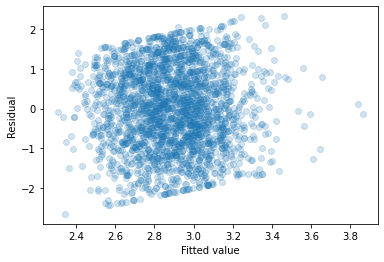

In [41]:
residuals = sm_model.fittedvalues - y

import matplotlib.pyplot as plt
plt.scatter(x = sm_model.fittedvalues, y = residuals, alpha = 0.2)
plt.xlabel("Fitted value")
plt.ylabel("Residual")

And now let's create a normal-QQ plot. We can do this using the `probplot()` function in the `scipy.stats` module like this:

((array([-3.43053872, -3.18208763, -3.04442891, ...,  3.04442891,
          3.18208763,  3.43053872]),
  array([-2.65469898, -2.43772079, -2.42635801, ...,  2.27775012,
          2.3060377 ,  2.32513139])),
 (1.0073658395195644, -7.159267277515343e-14, 0.9938147583119205))

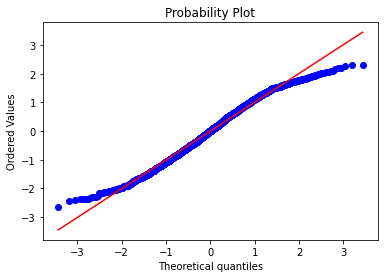

In [42]:
import scipy as sp
sp.stats.probplot(residuals, dist = "norm", plot = plt, fit = True)

# Logistic Regression

Now let's see an example of logistic regression. The file `loans.csv` has real data from an online platform called Lending Club. Each row represents a loan given out on Lending Club. We have information on what the loan is for, the interest rate charged etc. We want to predict if a loan will be paid back.

## Exploring the data

Let's start by reading in the data and having a look at using `pandas-profiling`.

In [43]:
loans = pd.read_csv("data/loans.csv")

In [44]:
pandas_profiling.ProfileReport(loans)

## Cleaning the data

There's a few things we need to do to clean this data. First, we are only interested in historical loan data. So let's filter the data.

In [45]:
loans_clean = loans.loc[loans["loan_status"] != "Current"].copy()

loans_clean.head()

loan_amnt       term  int_rate grade home_ownership  annual_inc  \
0     5000.0  36 months     10.65     B           RENT     24000.0   
1     2500.0  60 months     15.27     C           RENT     30000.0   
2     2400.0  36 months     15.96     C           RENT     12252.0   
3    10000.0  36 months     13.49     C           RENT     49200.0   
5     5000.0  36 months      7.90     A           RENT     36000.0   

          purpose  loan_status  
0     credit_card   Fully Paid  
1             car  Charged Off  
2  small_business   Fully Paid  
3           other   Fully Paid  
5         wedding   Fully Paid

We saw from the pandas profiling report there was quite a few missing values here. Let's check there are still missing values in this subsetted dataset.

In [46]:
loans_clean.isna().sum()

loan_amnt         5
term              5
int_rate          5
grade             0
home_ownership    5
annual_inc        9
purpose           5
loan_status       5
dtype: int64

We've still got some missing values. The right thing to do would be to investigate why the values were missing and decide what action to take. Back when you learnt about the tidyverse we discussed all the ways of dealing with missing values. For this lesson, let's be lazy and just delete all missing values.

In [47]:
loans_clean.dropna(inplace = True)

Let's check we have removed the missing values:

In [48]:
loans_clean.isna().sum()

loan_amnt         0
term              0
int_rate          0
grade             0
home_ownership    0
annual_inc        0
purpose           0
loan_status       0
dtype: int64

We want to predict if a loan has been paid off, but we have several values for `loan_status`. We need to make a new column that just checks if loan status is equal to "Fully Paid", and return a value of `1` if so and 0 otherwise (since `scikit-learn` always needs numeric data). We can use the function `where` from `numpy` that we saw yesterday to do this.

In [49]:
import numpy as np

In [50]:
loans_clean.loc[:, "paid"] = np.where(loans_clean["loan_status"] == "Fully Paid", 1, 0)

loans_clean.head()

loan_amnt       term  int_rate grade home_ownership  annual_inc  \
0     5000.0  36 months     10.65     B           RENT     24000.0   
1     2500.0  60 months     15.27     C           RENT     30000.0   
2     2400.0  36 months     15.96     C           RENT     12252.0   
3    10000.0  36 months     13.49     C           RENT     49200.0   
5     5000.0  36 months      7.90     A           RENT     36000.0   

          purpose  loan_status  paid  
0     credit_card   Fully Paid     1  
1             car  Charged Off     0  
2  small_business   Fully Paid     1  
3           other   Fully Paid     1  
5         wedding   Fully Paid     1

Now let's drop the `loan_status` column:

In [51]:
loans_clean.drop(columns = "loan_status", inplace = True)

Again, since we need numeric data then we need dummy variables.

In [52]:
loans_clean = pd.get_dummies(loans_clean, drop_first = True)

loans_clean.head()

loan_amnt  int_rate  annual_inc  paid  term_60 months  grade_B  grade_C  \
0     5000.0     10.65     24000.0     1               0        1        0   
1     2500.0     15.27     30000.0     0               1        0        1   
2     2400.0     15.96     12252.0     1               0        0        1   
3    10000.0     13.49     49200.0     1               0        0        1   
5     5000.0      7.90     36000.0     1               0        0        0   

   grade_D  grade_E  grade_F  ...  purpose_home_improvement  purpose_house  \
0        0        0        0  ...                         0              0   
1        0        0        0  ...                         0              0   
2        0        0        0  ...                         0              0   
3        0        0        0  ...                         0              0   
5        0        0        0  ...                         0              0   

   purpose_major_purchase  purpose_medical  purpose_moving  purpose_other  \
0                       0                0               0              0   
1                       0                0               0              0   
2                       0                0               0              0   
3                       0                0               0              1   
5                       0                0               0              0   

   purpose_renewable_energy  purpose_small_business  purpose_vacation  \
0                         0                       0                 0   
1                         0                       0                 0   
2                         0                       1                 0   
3                         0                       0                 0   
5                         0                       0                 0   

   purpose_wedding  
0                0  
1                0  
2                0  
3                0  
5                1  

[5 rows x 28 columns]

Now finally we can split our data into predictors and the target variable.

In [53]:
X = loans_clean.drop(columns = "paid")
y = loans_clean["paid"]

For this example, since we are more interested in making predictions than interpreting the model, let's split the data into a test and training set. We can do this using the function `train_test_split` from `scikit-learn`. 

In [54]:
from sklearn.model_selection import train_test_split

Here we have set the `test_size` to 0.1, to take 10% of the data as a test set. Specifying `random_state` is like using `set.seed` in R. This makes the random splitting of the data reproducible.

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 7)

The code above uses Python "syntactic sugar". Since `train_test_split` returns a tuple, we can define several variables at once.

## Building the model

Now that we have the test and training set we can run our model. This time we are using logistic regression, so we need to import `LogisticRegression`, define our model object, then fit to the training data.

In [56]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train, y_train)

LogisticRegression()

Now we can see the mean accuracy on the training data. Like with `LinearRegression` we know the metric returned from `score()` is accuracy from the documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html). 

In [57]:
model.score(X_train, y_train)

0.7977246689579837

And on the test data.

In [58]:
model.score(X_test, y_test)

0.7995684488132342

We can also get other metrics such as ROC and AUC. Recalling that to calculate the ROC what we want is the predicted probabilities and then the observed values in the data. First we want to return the predicited probabilities from our model:

In [59]:
pred_test = model.predict_proba(X_test)
pred_test

array([[0.17536771, 0.82463229],
       [0.22304813, 0.77695187],
       [0.07003543, 0.92996457],
       ...,
       [0.26366319, 0.73633681],
       [0.25580179, 0.74419821],
       [0.21263359, 0.78736641]])

We see we get an array with 2 entries for every row of the data - these are the probabilities for both outcomes (0 or 1) for the `paid` column - i.e. every row will add to 1. We just want the probabilities of the positive outcome - that the loan will be paid - which is the right hand column of the array:

In [60]:
pred_test = pred_test[:, 1]
pred_test

array([0.82463229, 0.77695187, 0.92996457, ..., 0.73633681, 0.74419821,
       0.78736641])

Now we have the 2 pieces of information required to calculate our AUC score from the ROC. We use the `roc_auc_score` function to calculate this:

In [61]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_true = y_test, y_score = pred_test)

0.5266430779825398


# Decision Trees

Now we are going to see an example of using a different model on the same data.

You should be beginning to see a pattern in how to use a model from `scikit-learn`: first we import the model, then we define a model object and finally we fit the model to the data.

To stop the tree getting too complicated we are going to change some parameters on the model object. We are going to set `max_features` to 3, this means we will use at most three variables. We will also limit the depth of the tree to 5. In reality we would tune these hyperparamters to work out their optimal value.

In [62]:
from sklearn import tree

model = tree.DecisionTreeClassifier(max_features = 3, max_depth = 5)

model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, max_features=3)

Again, we can get the mean accuracy for this model by using the `score` method.

In [63]:
model.score(X_test, y_test)

0.7995684488132342


# Random Forest

In the last part of this lesson we are going to cover a model that you have not seen before. 

Random forest is a powerful, general classifier algorithm. It is called random forest because it uses a collection of decision trees!

First we set the number of trees you want to build. Then you take a random sub sample of the data and build a decision tree on it. You repeat this process for every tree. Each tree should be built on it's own sub sample of the data. Now we have a big collection of decision trees. 

If we want to make a prediction, first we make a prediction using every tree in the set, then we take the average answer. For example, if we have 10 trees and 3 of them guess that a loan will not be repaid and 7 guess that it will, then our answer will be a 70% chance that the loan is repaid. 

![](images/random_forest.jpg)

This has a big advantage over decision trees because decision trees can be very sensitive to small changes in data. A slightly different dataset will give a totally different tree structure. We can "average" over the possible tree structures for the data by using a random forest.

This type of model building, where we average across several models, is often called "ensemble learning".

Let's see an example in Python. Again, we import he model, define the model object and finally fit to our data.

In [64]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 10)

model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10)

Here we set `n_estimators` to be 10, because we are using 10 decision trees.

**Task - 5 minutes**

Find the mean accuracy on the test data and compare it to our two other models.

**Solution**

In [65]:
model.score(X_test, y_test)

0.7664828578278591

There is randomness here, so your model will have slightly different results!

</summary>
</blockquote>

# Additional Resources

The `patsy` library will let you use formula notation in Python: https://patsy.readthedocs.io/en/latest/